In [2]:
import pandas as pd
import geopandas as gpd

In [4]:
fregu = gpd.read_file("gadm41_PRT_3.geojson")

In [9]:
freg2 = gpd.read_file("freguesias-shapefile/Cont_AAD_CAOP2017.shp")

In [14]:
freg2

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -..."
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -..."
2,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.12 -287903.523, -15487.725 -2..."
3,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.56 -287893.679, -15521.65 -28..."
4,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -..."
...,...,...,...,...,...,...,...,...,...
3218,160307,Fiães,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,1121.27,1121.27,Fiães,"POLYGON ((-6958.588 271490.176, -6819.697 2714..."
3219,160323,União das freguesias de Vila e Roussas,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,1150.87,1150.87,Vila e Roussas,"POLYGON ((-7410.359 271732.2, -7426.438 271720..."
3220,160322,União das freguesias de Prado e Remoães,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,366.75,366.75,Prado e Remoães,"POLYGON ((-10963.311 272457.595, -10986.16 272..."
3221,160320,União das freguesias de Chaviães e Paços,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,847.90,847.90,Chaviães e Paços,"POLYGON ((-6958.588 271490.176, -7410.359 2717..."


In [10]:
import pandas as pd

# 1. Definir os Concelhos de interesse (Geralmente em maiúsculas nos dados oficiais/CAOP)
concelhos_alvo = ['PÓVOA DE VARZIM', 'VILA DO CONDE']

# 2. Lista de termos únicos baseados na imagem (sem os textos entre parênteses)
# Estes termos funcionam tanto para 'Des_Simpli' quanto para nomes completos com 'União das...'
nomes_freguesias = [
    # Póvoa de Varzim
    "Aver-o-Mar, Amorim e Terroso",
    "Aguçadoura e Navais",
    "Estela",
    "Póvoa de Varzim, Beiriz e Argivai",
    
    # Vila do Conde
    "Azurara",
    "Mindelo",
    "Vila Chã",
    "Vila do Conde", # A freguesia sede
    "Labruge"
]

# 3. Filtragem em duas etapas para garantir precisão

# Etapa A: Filtrar apenas os concelhos desejados para reduzir o universo de busca
# Usamos str.upper() para garantir que 'Póvoa de Varzim' encontre 'PÓVOA DE VARZIM'
geo_subset = freg2[freg2['Concelho'].str.upper().isin(concelhos_alvo)].copy()

# Etapa B: Criar uma expressão regular (Regex) para buscar qualquer um dos nomes da lista
# O '|' funciona como um "OU" lógico na busca de texto
pattern = '|'.join(nomes_freguesias)

# 4. Aplicar o filtro final
# Usamos 'Des_Simpli' preferencialmente pois costuma ser mais limpo, 
# mas se falhar, troque por 'Freguesia'
selecao_final = geo_subset[geo_subset['Des_Simpli'].str.contains(pattern, case=False, regex=True)]

# Verificar o resultado
print(f"Total de freguesias selecionadas: {len(selecao_final)}")
print(selecao_final[['Concelho', 'Des_Simpli']])

Total de freguesias selecionadas: 9
             Concelho                         Des_Simpli
2317    VILA DO CONDE                            Labruge
2344    VILA DO CONDE                           Vila Chã
2376    VILA DO CONDE                            Mindelo
2415    VILA DO CONDE                            Azurara
2438    VILA DO CONDE                      Vila do Conde
2492  PÓVOA DE VARZIM  Póvoa de Varzim, Beiriz e Argivai
2537  PÓVOA DE VARZIM       AVer-o-Mar, Amorim e Terroso
2560  PÓVOA DE VARZIM                Aguçadoura e Navais
2602  PÓVOA DE VARZIM                             Estela


In [12]:
selecao_final["id"] = selecao_final["Dicofre"]
selecao_final["name"] = selecao_final["Freguesia"]
selecao_final["poly_type"] = "core"
selecao_final = selecao_final[["id", "name", "poly_type", "geometry"]]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarni

In [15]:
selecao_final.to_file("freguesias_Uni_Minho.geojson")

<Axes: >

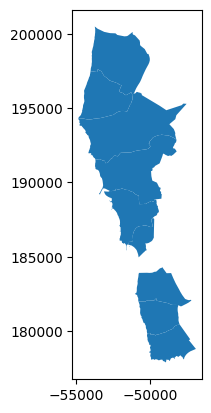

In [17]:
selecao_final.plot()

In [19]:
# 1. Definir o CRS atual se ele não estiver definido (pela sua amostra, parece ser o PT-TM06)
if selecao_final.crs is None:
    selecao_final.set_crs(epsg=3763, inplace=True)

# 2. Converter para WGS84 (Latitude/Longitude - O padrão mundial)
selecao_wgs84 = selecao_final.to_crs(epsg=4326)

# Verificar o resultado (agora as coordenadas parecerão algo como 41.3, -8.7)
print(selecao_wgs84.crs)
#print(selecao_wgs84[['Des_Simpli', 'geometry']].head())

EPSG:4326


In [23]:
selecao_wgs84.to_file("freguesias_Uni_Minho.geojson")